<b>Felipe Wendling Heidenfelder - Case Titanic - FEA.dev</b> 

Data: 29/10/2022

<img src='https://coopersystem.com.br/wp-content/uploads/2020/10/blogpost-inteligencia-artificial-fatos-1024x322.png' height="100%" width="3500">

# <font color=blue|blue|red>Case Inteligência Artificial</font> 

Opa, tudo bom? Seja muito bem vindo ao Case de IA!

<ins>**_Qual será sua task:_**</ins>

"Você foi contratado como um Cientista de Dados de uma grande empresa. Logo no primeiro dia de trabalho seus superiores lhe mostraram os diversos problemas e desafios que você teria que resolver. Um deles está relacionado à uma base de dados do naufrágio do Titanic e seu objetivo seria desenvolver um modelo de Machine Learning que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input. Você logo de cara lembrou do KNN, um ótimo modelo de classificação e decidiu aplicá-lo na base de dados"

### Base de Dados:
- O nome do arquivo com a base de dados é: "titanic_data.csv"

- Abaixo estão as descrições das colunas do nosso Dataset:
    - passengerid = ID do passageiro do navio (código primário).
    - survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não       sobreviveu.
    - pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior       classe.
    - name = Nome do passageiro
    - sex = Gênero do passageiro, sendo masculino e feminino.
    - age = Idade do passageiro na data da ocorrência do naufrágio.
    - sibsp = Número de irmãos / cônjuges a bordo.
    - parch = Número de pais / filhos a bordo.
    - ticket = Código do ticket.
    - fare = Valor da passagem.
    - cabin = Código de identificação da Cabine.
    - embarked = Local ondem o passageiro embarcou no navio.

### Sua Estratégia:

Para não ter erro em sua entrega, você decidiu iniciar o projeto estudando um pouco mais sobre o KNN. Ao avisar seu chefe Douglas, ele lhe deu a liberdade de pesquisar por toda a internet e recomendou as seguintes fontes:

- (FEA.Dev) Machine Learning usando Python - modelo KNN (AULA PRÁTICA): https://www.youtube.com/watch?v=xL2RK0QYtHc
- StatQuest: K-nearest neighbors, Clearly Explained: https://www.youtube.com/watch?v=HVXime0nQeI
- Machine Learning na prática com o algoritmo KNN em Python: https://minerandodados.com.br/machine-learning-na-pratica-knn-python/

Além das recomendações, por ser seu primeiro projeto, Douglas resolveu lhe ajudar dando algumas dicas:

1. Explore um pouco a base de dados, entenda as colunas e qual o será o seu objetivo.


2. Faça uma análise inicial dos dados e realize um tratamento deles (se necessário).


3. Separe os dados em conjunto de treino(70%) e conjunto de test (30%)
    - Caso não saiba o que é isso, de uma googlada.


4. Crie o modelo
    - Recomendação de biblioteca: scikit-learn (o famoso sklearn)
    
    
5. Procure por métricas de avaliação do seu modelo

### Meta proposta pelo Douglas

Para ser considerado um bom modelo, Douglas colocou como meta uma precisão de pelo menos 60% no conjunto de teste (Obs: Lembre-se que a precisão do modelo no conjunto de treinamento e no conjunto de teste serão diferentes e o que Douglas está avaliando é no conjunto de teste)

### Dúvidas

Caso tenha dúvidas ou problemas no código sinta-se livre para chamar qualquer membro do grupo de estudo de IA do FEA.Dev.

### <font color=blue|blue|red>A partir de agora é o seu momento de desenvolver o modelo, Boa Sorte!</font> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.metrics import classification_report, accuracy_score

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Ler base de dados

In [3]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 

# Colunas inúteis para o modelo de ML:
- PassangerID
- Ticket
- Cabin

In [4]:
df = df.drop(["PassengerId","Ticket","Cabin"], axis=1)
df = df[df['Embarked'].notna()]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


# 

# Substituir NaN da coluna "Age" pela média da idade do tipo de tipo de classe de passagem por possuir maior correlação

In [6]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


In [7]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


# 

### Agrupar por Classe e calcular a média da idade de cada classe e criar um dicionário 

In [8]:
grupo = df[["Pclass","Age"]].groupby("Pclass").agg(["mean"])
display(grupo)
keys = list(grupo.index)

values = list([int(i) for i in grupo.values])

dic = dict(zip(keys, values))
dic

,Age
,mean
Pclass,
1,38.105543
2,29.877630
3,25.140620


{1: 38, 2: 29, 3: 25}

In [9]:
df["missing_age"] = df["Pclass"].map(dic)
df["Age"] = df["Age"].fillna(value= df["missing_age"])
df = df.drop("missing_age", axis=1)

df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 

### Separando as variáveis quantitativas para tratamento

In [13]:
quantitatives = df.select_dtypes(['int64', float])

In [14]:
skew_sup = []
for i in quantitatives.columns:
    z = round(df[i].skew(),2)
    if z>1: skew_sup.append(i)
    print(i,": ", z)
    

Survived :  0.48
Pclass :  -0.64
Age :  0.52
SibSp :  3.69
Parch :  2.75
Fare :  4.8


### Fazer transformação nas variáveis com skew maior que 1

In [15]:
for i in skew_sup:
    df[i] = df[i].apply(lambda x: x**(1/3))
    
for i in quantitatives.columns:
    z = round(df[i].skew(),2)
    print(i,": ", z)

Survived :  0.48
Pclass :  -0.64
Age :  0.52
SibSp :  1.03
Parch :  1.34
Fare :  1.24


# 


### Substituir da coluna Sexo, male = 1 e female = 0

In [16]:
sexo = {"male":1, "female":0}
df["Sex"] = df["Sex"].map(sexo)

df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,1.935438,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0.0,4.146318,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0.0,1.993730,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0.0,3.758647,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0.0,2.004158,S


### 

### Substituindo o nome pelo complemento nominal

In [22]:
df["Name"] = df["Name"].apply(lambda x: (x.split(",")[1].split(".")[0]).strip())
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,1,22.0,1.0,0.0,1.935438,S
1,1,1,Mrs,0,38.0,1.0,0.0,4.146318,C
2,1,3,Miss,0,26.0,0.0,0.0,1.993730,S
3,1,1,Mrs,0,35.0,1.0,0.0,3.758647,S
4,0,3,Mr,1,35.0,0.0,0.0,2.004158,S


# 

In [24]:
df["Name"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

# 


# Agrupando por Sexo 

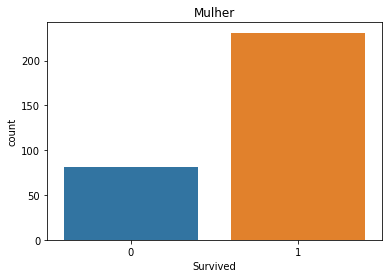

<AxesSubplot:title={'center':'Homem'}, xlabel='Survived', ylabel='count'>

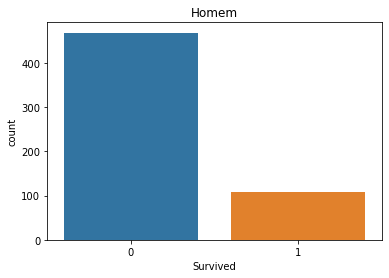

In [18]:
mulher = df[df["Sex"] == 0][["Sex","Survived"]].groupby("Survived").agg(["count"])
homem = df[df["Sex"] == 1][["Sex","Survived"]].groupby("Survived").agg(["count"])

plt.title("Mulher")
sns.barplot(mulher.index, mulher["Sex"]["count"])
plt.show()

plt.title("Homem")
sns.barplot(homem.index, homem["Sex"]["count"])

# 


# Criando o modelo

In [16]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X = pd.get_dummies(X)

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Capt,Name_Col,Name_Don,Name_Dr,...,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1.0,0.000000,1.935438,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,38.0,1.0,0.000000,4.146318,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3,0,26.0,0.0,0.000000,1.993730,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1.0,0.000000,3.758647,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3,1,35.0,0.0,0.000000,2.004158,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0.0,0.000000,2.351335,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
887,1,0,19.0,0.0,0.000000,3.107233,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,3,0,25.0,1.0,1.259921,2.862294,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,1,26.0,0.0,0.000000,3.107233,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# 

##  Gráfico da diferença entre pessoas que viveram e morreram

<AxesSubplot:xlabel='Survived', ylabel='count'>

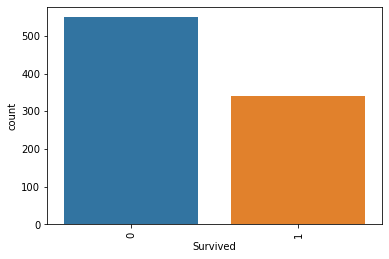

In [18]:
plt.xticks(rotation=90)
sns.countplot(y)

### Divisão da base em Treino e Teste (30% test)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state= 0, test_size = 0.3)

##### 

### Normalizando as variáveis

In [20]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# 


# KNN - Finding n neighbors

In [27]:
kf = StratifiedKFold(shuffle= True, n_splits = 10)

for i in range(1, 10):
    
    model = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)

    cross_val = cross_val_score(model, X, y, cv = kf)
    y_predict = model.predict(X_test)
    
    print(f"Accuracy score com {i} vizinhos: {round(accuracy_score(y_predict, y_test),2)}")
    print("Cross - Val: ", round(cross_val.mean(),2),"%")
    print("\n")

Accuracy score com 1 vizinhos: 0.75
Cross - Val:  0.75 %


Accuracy score com 2 vizinhos: 0.82
Cross - Val:  0.77 %


Accuracy score com 3 vizinhos: 0.84
Cross - Val:  0.79 %


Accuracy score com 4 vizinhos: 0.85
Cross - Val:  0.78 %


Accuracy score com 5 vizinhos: 0.85
Cross - Val:  0.78 %


Accuracy score com 6 vizinhos: 0.86
Cross - Val:  0.79 %


Accuracy score com 7 vizinhos: 0.85
Cross - Val:  0.78 %


Accuracy score com 8 vizinhos: 0.85
Cross - Val:  0.78 %


Accuracy score com 9 vizinhos: 0.84
Cross - Val:  0.78 %




# 


# KNN - 6 Neighbours

In [29]:
model = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)

cross_val = cross_val_score(model, X, y, cv = kf)
y_predict = model.predict(X_test)

print(f"KNN com {i} vizinhos: {round(accuracy_score(y_predict, y_test),2)}")
print("Cross - Val: ", round(cross_val.mean(),2),"%")
print("\n")

KNN com 9 vizinhos: 0.86
Cross - Val:  0.78 %




In [30]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       181
           1       0.74      0.87      0.80        86

    accuracy                           0.86       267
   macro avg       0.83      0.86      0.84       267
weighted avg       0.87      0.86      0.86       267



In [31]:
resultado = pd.DataFrame({"Real":y_test,
                          "Predicted": y_predict})
resultado["Acertos"] = np.where(resultado["Real"] == resultado["Predicted"], 1, 0)

Accuracy = round(resultado["Acertos"].sum()/resultado.shape[0],4)*100 
print(f"A Accuracy é de: {round(Accuracy,2)}%\n\nBem maior que 60%, parabéns!")

resultado.loc["Total"] = resultado.sum()

linhas = resultado.shape[0]
resultado["Real"].iloc[-1] = linhas
resultado["Predicted"].iloc[-1] = linhas
resultado.tail(10)

A Accuracy é de: 85.77%

Bem maior que 60%, parabéns!


,Real,Predicted,Acertos
747,1,1,1
758,0,0,1
849,1,1,1
647,1,0,0
724,1,0,0
655,0,0,1
665,0,0,1
346,1,1,1
221,0,0,1
Total,268,268,229


# 


# 
